<a href="https://colab.research.google.com/github/Its-Laba/DataProjects/blob/main/StudyGDP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# STUDY OF GDP

In this document we will present the cleaning and exploratory analysis of a dataset where the GDP from 1960 to 2021 is exposed. *Dataset extracted from kaggle*

The purpose of this workbook is to explore the archive by understanding each of the columns and visualizing the change of the GDP over time.

## Imports

To start with this notebook we must first import the libraries we are going to use.

In [1]:
# Author: Its_Laba ----- Lucas Abad 

import numpy as np
import pandas as pd

## Loading data

To facilitate the reproduction of the program we loaded the dataset from Google Drive. For more information about the dataset you can view it in the following link of kaggle:

[Dataset](https://www.kaggle.com/datasets/yapwh1208/countries-gdp-2012-to-2021?resource=download)

In [2]:
!gdown https://drive.google.com/uc?id=1I3_zHwKYJfUX9H-ZzT5R36fJQZu5_Auo

Downloading...
From: https://drive.google.com/uc?id=1I3_zHwKYJfUX9H-ZzT5R36fJQZu5_Auo
To: /content/GDP.csv
100% 165k/165k [00:00<00:00, 23.4MB/s]


In [3]:
file_name = "GDP.csv"
df = pd.read_csv(file_name)

There is no need to indicate any separator in the pandas method and we can display some lines of the table to start looking at the data.

In [4]:
df.head(2)

,Country Name,Country Code,1960,1961,1962,1963,1964,1965,1966,1967,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Aruba,ABW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,25609.955720,26515.678080,26942.307980,28421.386490,28451.273740,29326.708060,30220.59452,31650.760540,24487.863560,29342.10086
1,Africa Eastern and Southern,AFE,162.913035,162.551683,172.00246,199.189238,179.387799,198.230368,209.414665,211.70706,...,1759.182395,1730.394686,1719.183721,1538.552268,1443.692371,1628.586788,1564.73434,1512.270553,1363.540741,1549.77273


Looking at these two lines we can see that the table consists of one row per country with 64 columns 2 to indicate the name of the country and 62 for each GDP value in its year. We can also see that not all columns have values.

## Cleaning the data

The dataset is quite clean so in this section we will check that the data types are correct and normalize the column names.

In [5]:
# ----- Normalize columns -----
columns = list(df.columns) 
columns[0] = "Country_Name"
columns[1] = "Country_Code"
df.columns = columns
df.columns

Index(['Country_Name', 'Country_Code', '1960', '1961', '1962', '1963', '1964',
       '1965', '1966', '1967', '1968', '1969', '1970', '1971', '1972', '1973',
       '1974', '1975', '1976', '1977', '1978', '1979', '1980', '1981', '1982',
       '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991',
       '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000',
       '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009',
       '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018',
       '2019', '2020', '2021'],
      dtype='object')

Cause we have 64 columns I will use dtypes instead of info() because info() will make the notebook very friendly to check the different types.

In [6]:
df.dtypes

Country_Name     object
Country_Code     object
1960            float64
1961            float64
1962            float64
                 ...   
2017            float64
2018            float64
2019            float64
2020            float64
2021            float64
Length: 64, dtype: object

We observe that in the columns of years the types are ok since they are going to be floats, but the first two columns have an object type. We are going to force Country_Name and Country_Code to be strings.

In [7]:
df[["Country_Name", "Country_Code"]] = df[["Country_Name", "Country_Code"]].astype("string")

In [8]:
# TEST ----------------
print("Type of Country_Name:", df["Country_Name"].dtype)
print("Type of Country_Code:", df["Country_Code"].dtype)

Type of Country_Name: string
Type of Country_Code: string


Finally, before exploring the data, we will replace all nulls by zeros for a better graphical representation in the future.

In [9]:
df_clean = df.replace(np.nan,0);

In [10]:
# TEST ---------------
if df_clean["1960"][0] == 0 :
  print("NaN's replace by 0's")

NaN's replace by 0's


Testing if everything is okey before exploring the data.

In [11]:
df_clean.head(2)

,Country_Name,Country_Code,1960,1961,1962,1963,1964,1965,1966,1967,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Aruba,ABW,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,...,25609.955720,26515.678080,26942.307980,28421.386490,28451.273740,29326.708060,30220.59452,31650.760540,24487.863560,29342.10086
1,Africa Eastern and Southern,AFE,162.913035,162.551683,172.00246,199.189238,179.387799,198.230368,209.414665,211.70706,...,1759.182395,1730.394686,1719.183721,1538.552268,1443.692371,1628.586788,1564.73434,1512.270553,1363.540741,1549.77273


In [12]:
df_clean[["Country_Name","Country_Code"]].dtypes

Country_Name    string
Country_Code    string
dtype: object

## Exploring the data

The dataset is now clean so let's start visualizing what we have in it.

In [13]:
df_clean.head()

,Country_Name,Country_Code,1960,1961,1962,1963,1964,1965,1966,1967,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Aruba,ABW,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,25609.955720,26515.678080,26942.307980,28421.386490,28451.273740,29326.708060,30220.594520,31650.760540,24487.863560,29342.100860
1,Africa Eastern and Southern,AFE,162.913035,162.551683,172.002460,199.189238,179.387799,198.230368,209.414665,211.707060,...,1759.182395,1730.394686,1719.183721,1538.552268,1443.692371,1628.586788,1564.734340,1512.270553,1363.540741,1549.772730
2,Afghanistan,AFG,62.369375,62.443703,60.950364,82.021738,85.511073,105.243196,143.103233,167.165675,...,663.141053,651.987862,628.146804,592.476537,520.252064,530.149831,502.056771,500.522664,516.866552,368.754614
3,Africa Western and Central,AFW,106.976475,112.047561,117.730633,122.278715,130.599963,137.186142,142.895375,127.303606,...,1953.407033,2149.295219,2243.271464,1876.623483,1645.023767,1585.911930,1731.311792,1749.303317,1683.436391,1757.030626
4,Angola,AGO,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,4962.552072,5101.983876,5059.080441,3100.830685,1709.515534,2283.214233,2487.500996,2142.238757,1603.993477,1953.533757


We note that each row of this dataset corresponds to the GDP data of a country, so we have as many countries as columns.

In [14]:
df_clean.shape

(266, 64)

In this dataset there are 266 countries. We can eliminate the code column since it provides less information than the complete country name.

In [15]:
df_final = df_clean.drop(columns="Country_Code")

Now that we have our final dataset we have about 266 countries to solve all the questions that may arise. For example, in this notebook we want to know:

1. Which countries have had the highest GDP in the last ten years? And which the lowest?

2. Which country has the biggest difference between the years 1960 and 2021?

Let's start with the question number 1.

To determine which country has the highest GDP in the last 10 years, we must first isolate the columns that provide us with information. That is Name + 2012:2021.

In [16]:
columns = [0] + list(range(53,63)) # Name + Last 10 years
last_10years = df_final[df_final.columns[columns]] 
last_10years.head()

,Country_Name,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Aruba,25609.955720,26515.678080,26942.307980,28421.386490,28451.273740,29326.708060,30220.594520,31650.760540,24487.863560,29342.100860
1,Africa Eastern and Southern,1759.182395,1730.394686,1719.183721,1538.552268,1443.692371,1628.586788,1564.734340,1512.270553,1363.540741,1549.772730
2,Afghanistan,663.141053,651.987862,628.146804,592.476537,520.252064,530.149831,502.056771,500.522664,516.866552,368.754614
3,Africa Western and Central,1953.407033,2149.295219,2243.271464,1876.623483,1645.023767,1585.911930,1731.311792,1749.303317,1683.436391,1757.030626
4,Angola,4962.552072,5101.983876,5059.080441,3100.830685,1709.515534,2283.214233,2487.500996,2142.238757,1603.993477,1953.533757


Having the table we must find the maximum values in each column and correlate them with the name of the country.

In [17]:
max = list(last_10years.max(axis="index"))[1:]
year = 2012
country_max_gdp= []
for gdp in max:
  country_max_gdp.append(last_10years[last_10years[str(year)] == gdp].Country_Name.values[0])
  year += 1

To solve which country has the lowest GDP we have a NaN problem. We cannot state that a country with a GDP of 0 is the lowest because we do not have that data so we have to eliminate all those countries from our table before we can see which is the lowest value.

In [18]:
without_NaN = last_10years[last_10years[["2012","2013","2014","2015","2016","2017","2018","2019","2020","2021"]] != 0]
min = list(without_NaN.min())[1:]
year = 2012
country_min_gdp= []
for gdp in min:
  country_min_gdp.append(last_10years[last_10years[str(year)] == gdp].Country_Name.values[0])
  year += 1

Obtaining:

In [19]:
#TEST ---------
print("the country with biggest GDP is:",list(set(country_max_gdp)), "with a current GDP in 2021 of: ", max[-1])
print("the country with smallest GDP is:",list(set(country_min_gdp)),"with a current GDP in 2021 of; ", min[-1])

the country with biggest GDP is: ['Monaco'] with a current GDP in 2021 of:  234315.4605
the country with smallest GDP is: ['Burundi'] with a current GDP in 2021 of;  221.4776762


Continuing with the second question. Let's find out which country has the biggest difference and also which country has the smallest difference.

We have the same problem as the previous question with NaN values.

In [20]:
without_NaN = df_final[df_final[["1960","2021"]] != 0]

We have to create a column for the difference of the two GDP and in the call of the final table we use the index to determine which country has the biggest and smallest difference.

In [21]:
GDP_Diff = without_NaN.assign(
                              GDP_Diff = lambda ds: ds["2021"] - ds["1960"]
                              )
max_diff = GDP_Diff.GDP_Diff.max()
min_diff = GDP_Diff.GDP_Diff.min()


In [22]:
#TEST ---------
print("the country with biggest GDP increment is:",df_final.iloc[GDP_Diff[GDP_Diff["GDP_Diff"]==max_diff].index].Country_Name.values[0], "with a GDP of: ", max_diff)
print("the country with smallest GDP increment is:",df_final.iloc[GDP_Diff[GDP_Diff["GDP_Diff"]==min_diff].index].Country_Name.values[0],"with a GDP of: ", min_diff)

the country with biggest GDP increment is: Luxembourg with a GDP of:  131348.131183
the country with smallest GDP increment is: Burundi with a GDP of:  150.11745194999997


## Visualization

Finally, I would like to be able to visually see the GDP progress of different countries. As we have a lot of them let's define a function that will show us the GDP of each year of a given country.

### Imports of visualization

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

### Function

In [24]:
def gpd (country):
  
  country_gdp = df_final[df_final["Country_Name"] == country].drop(columns="Country_Name")

  gdp_df = pd.DataFrame({
        'Year': list(country_gdp.columns),
        'GDP': country_gdp[list(country_gdp.columns)].values[0]
    })
  
  plt.title("GDP of "+country)
  sns.lineplot(x="Year",y="GDP",data=gdp_df)
  plt.xticks(range(0, len(list(country_gdp.columns)), 10), list(country_gdp.columns)[::10])
  plt.grid()
  plt.show()

### Test

We have already defined the function to paint the graph so let's analyze the gdp of Spain.

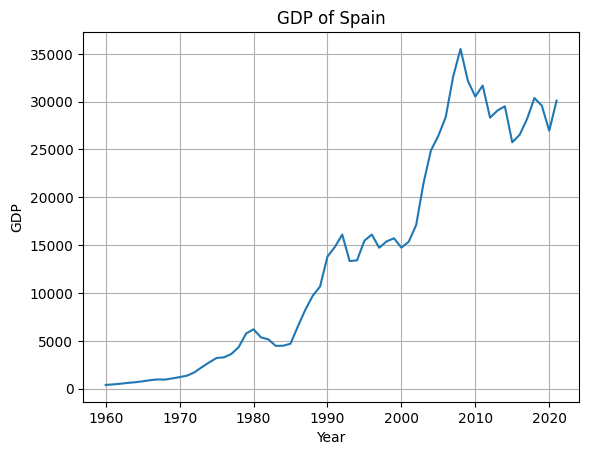

In [25]:
gpd("Spain")

We can observe that in the last 60 years Spain has increased its GPD considerably. There are 3 trend changes in the graph that correspond to the crises that the country has had, in 1980, 1993 and 2008.

## Observations

This has been my process to clean and draw conclusions from a dataset found on the internet. Feel free to comment on any bugs I have or any changes to improve the code. This has been a practical example of the first stages of a dataset in data science. Making this notebook I have realized that despite working with a "clean" dataset you have to modify it according to what you want. 